# <center>DIAMOND PRICE PREDICTION

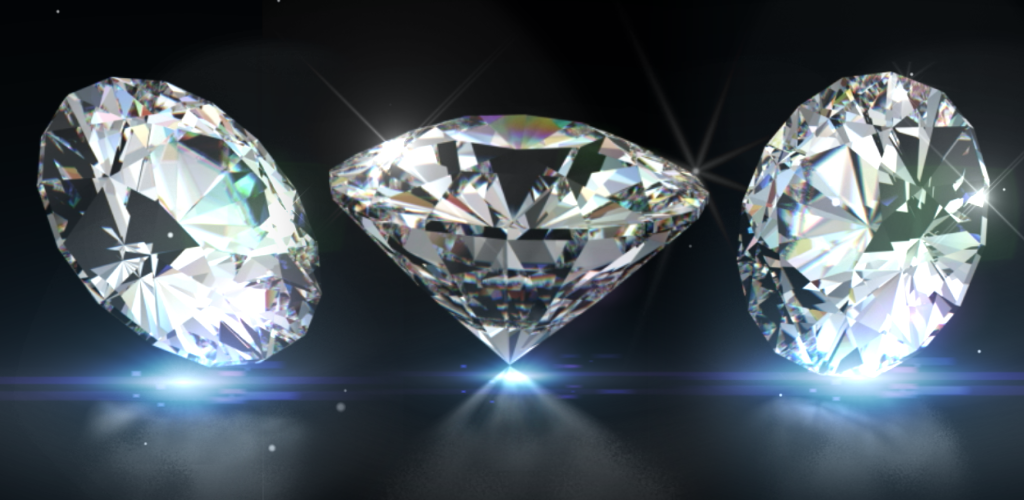

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [2]:
#load the dataset
data=pd.read_csv("diamonds  NEW.csv")

# <center>Exploratory Data Analysis

In [3]:
#checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [5]:
data.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,b'Ideal',b'D',b'SI2',62.2,55.0,2757.0,5.83,5.87,3.64


In [6]:
data.sample()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
33159,0.31,b'Premium',b'H',b'IF',61.7,58.0,816.0,4.33,4.36,2.68


In [7]:
#checking statistical analysis of numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
'x',53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
'y',53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
'z',53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [8]:
#checking duplcated data
data.duplicated().sum()

146

In [9]:
#drop the duplicates
data.drop_duplicates(inplace=True)

In [10]:
#checking dataset column and row numbers
data.shape

(53794, 10)

In [11]:
#checking missing value
data.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
'x'        0.0
'y'        0.0
'z'        0.0
dtype: float64

# <center> GRAPHICAL VISUALIZATION

# Univariate Analysis

# Box plot

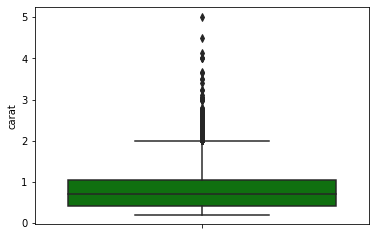

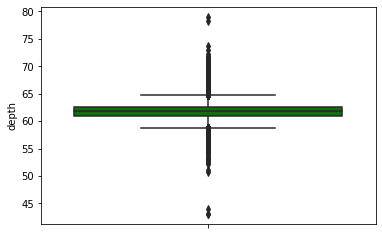

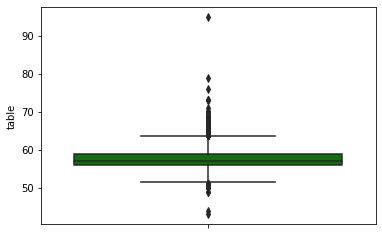

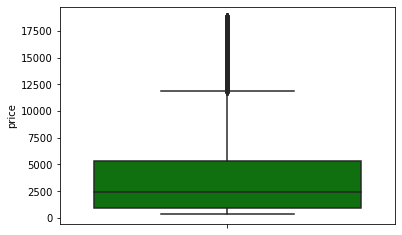

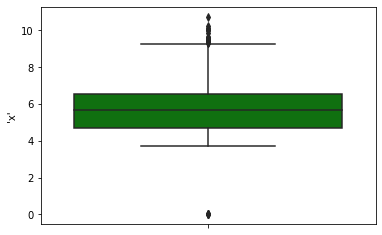

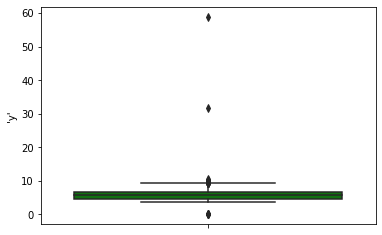

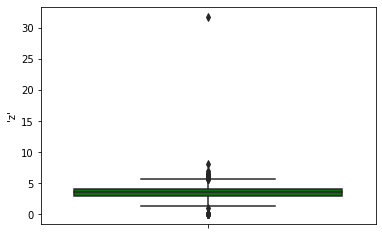

In [12]:
#finding outliers
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

## Histplot

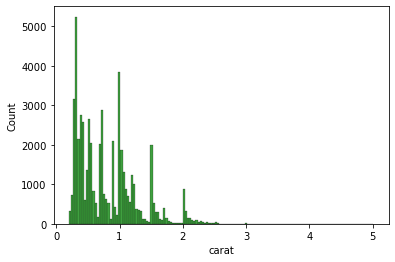

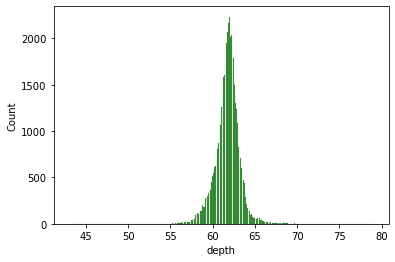

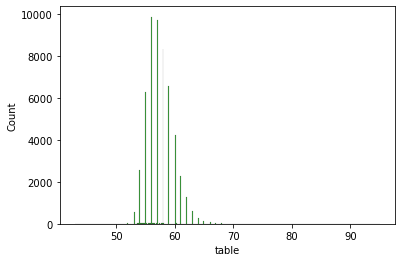

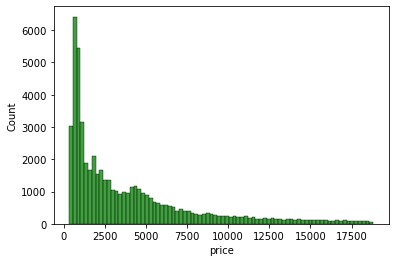

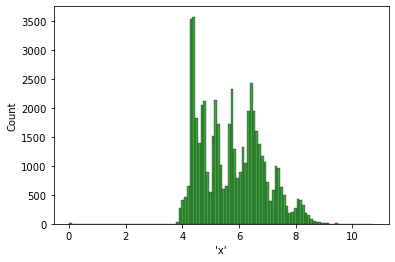

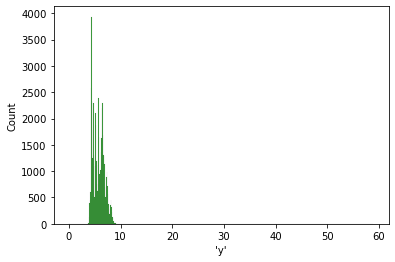

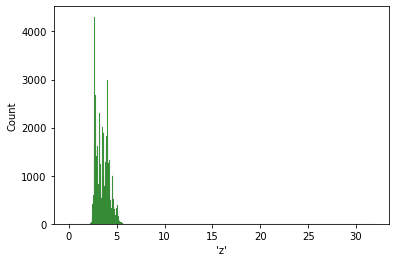

In [13]:
##To check whether it is uniform distribution (freequency) or not
for i in data.columns:
    if data[i].dtype!="object":
        sns.histplot(x=data[i],color="green")
        plt.show()

## KDE plot

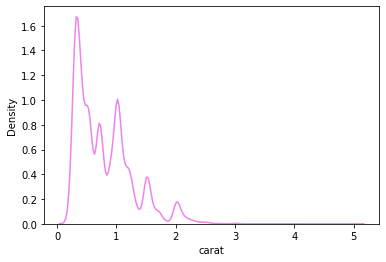

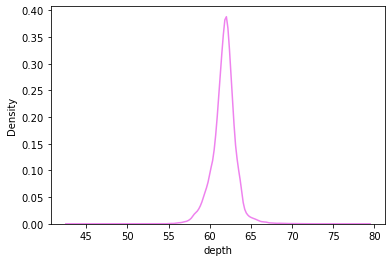

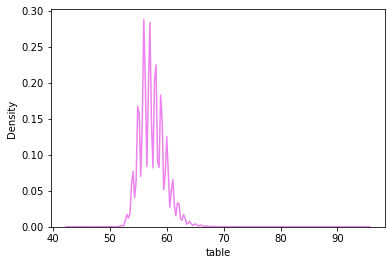

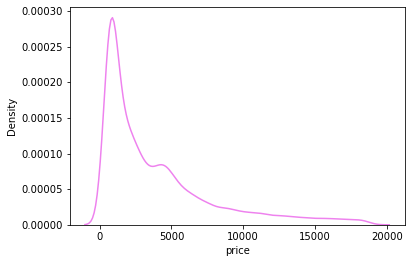

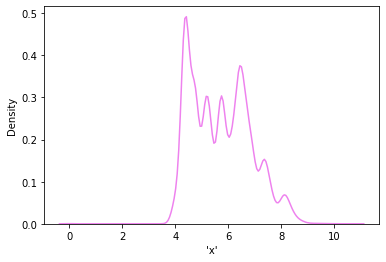

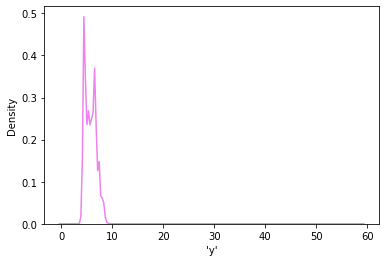

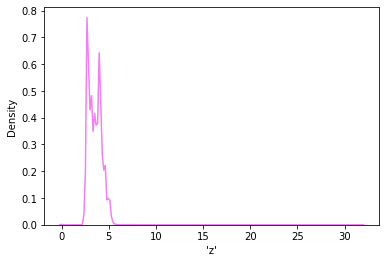

In [14]:
#To check whether it is uniform distribution (Density) or not
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot(x=data[i],color="violet")
        plt.show()

# Multi variate analysis

### Count Plot

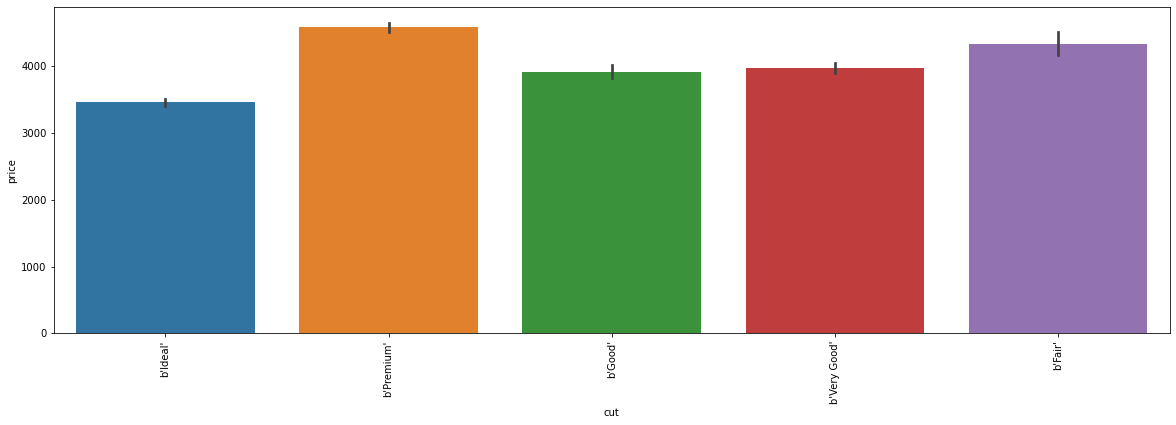

In [15]:
plt.figure(figsize=(20,6))
sns.barplot(x='cut',y="price", data=data);
plt.xticks(rotation=90)
plt.show()

## Pairplot

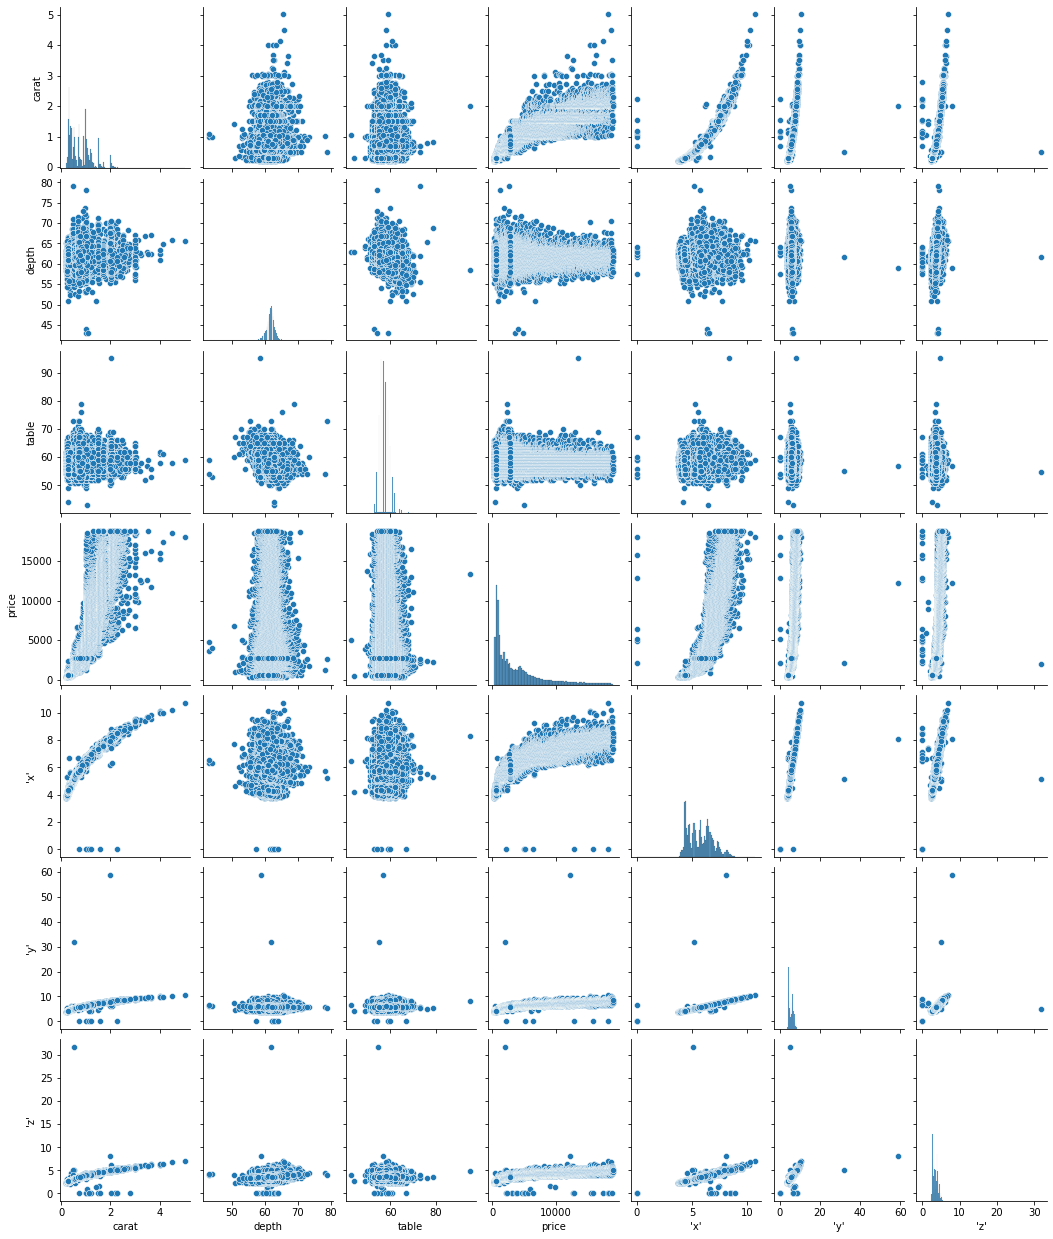

In [16]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(data=data,aspect=.85);

## Lineplot

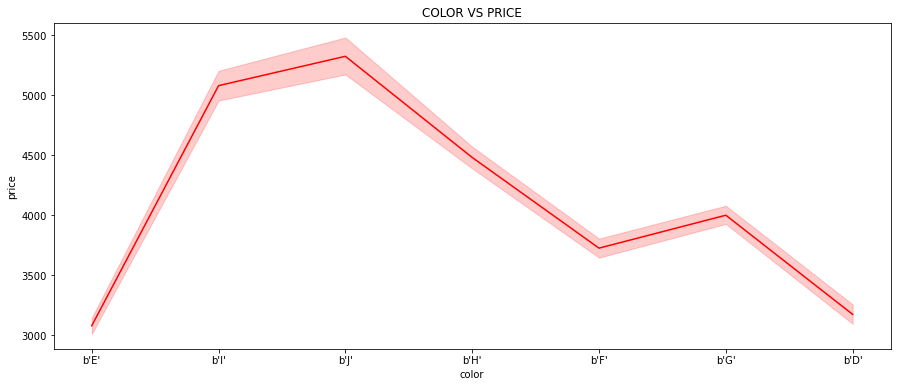

In [17]:
#To connects a series of data points using a line
plt.figure(figsize=(15,6))
plt.title('COLOR VS PRICE')
sns.lineplot(x='color', y='price', data=data,color="red");

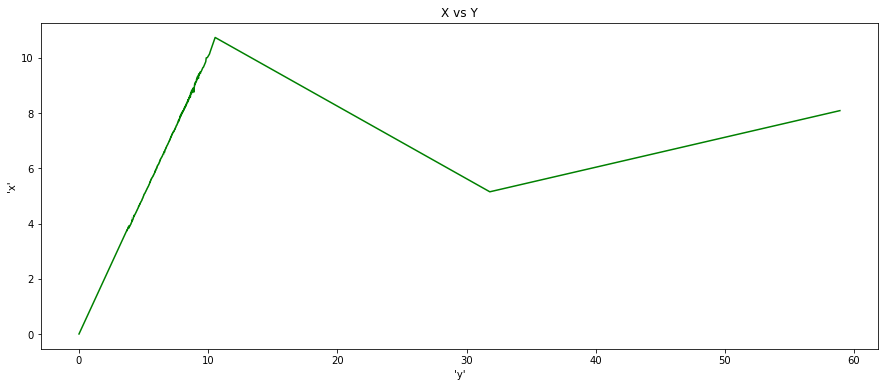

In [18]:
#To connects a series of data points using a line
plt.figure(figsize=(15,6))
plt.title('X vs Y')
sns.lineplot(x="'y'", y="'x'", data=data,color="green");

# REMOVE OUTLIERS

In [20]:
def outer_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR =Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [21]:
for column in data.columns:
    if data[column].dtype != 'object':
        UL,LL=outer_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

In [22]:
data.dropna(inplace=True)

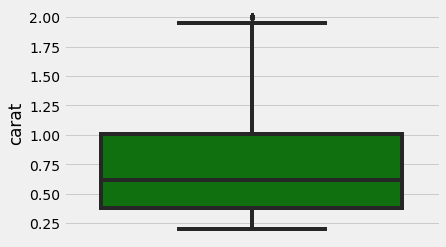

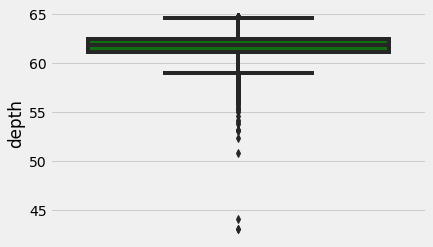

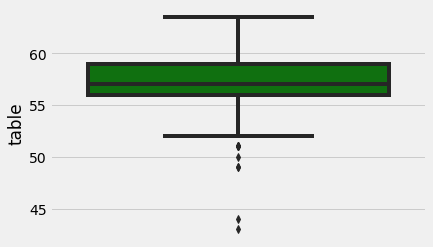

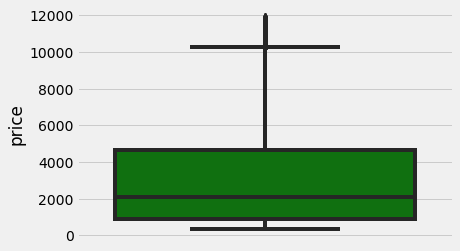

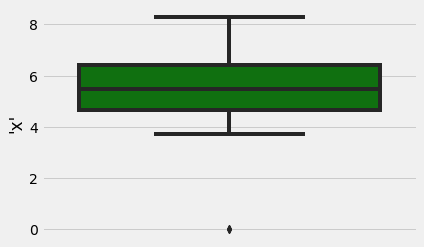

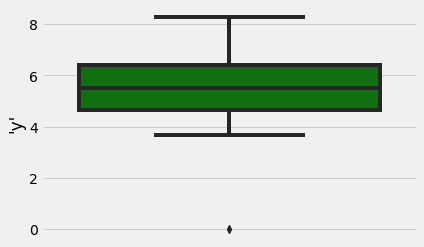

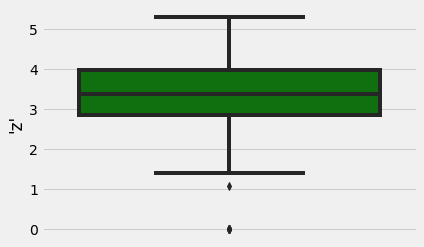

In [23]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

# Label encoding the categorical columns

In [24]:
#Encoding the categorical data to numerical
le=LabelEncoder()

In [25]:
data['color']=le.fit_transform(data['color'])
data['clarity']=le.fit_transform(data['clarity'])
data['cut']=le.fit_transform(data['cut'])

In [26]:
data

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


# Checking the correlation with the target 'price'

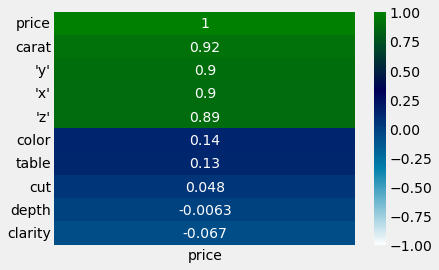

In [27]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap="ocean_r");

In [30]:
#Drop the target column from the X variable
x=data[["carat", "cut", "color", "clarity", "depth", "table","'x'","'y'","'z'"]].values

In [31]:
#Create Y variable with target column
y=data[["price"]].values

# Model Buliding

In [32]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [33]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  911.4871566013342
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  911.9696063684902
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  718.6959727186488
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1016.567534327203
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  584.1188523234955
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  570.8747912188039
************************************

# Selecting Random forest regressor as it is having best metrics

In [34]:
#Split the dataset first before ML creating model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
model=RandomForestRegressor()

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred=model.predict(x)

In [38]:
Output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
Output

,ACTUAL,PREDICTED
0,326.0,389.900
1,326.0,351.100
2,334.0,380.500
3,335.0,401.490
4,336.0,352.660
...,...,...
48612,2757.0,2815.020
48613,2757.0,2771.860
48614,2757.0,2729.964
48615,2757.0,2782.440


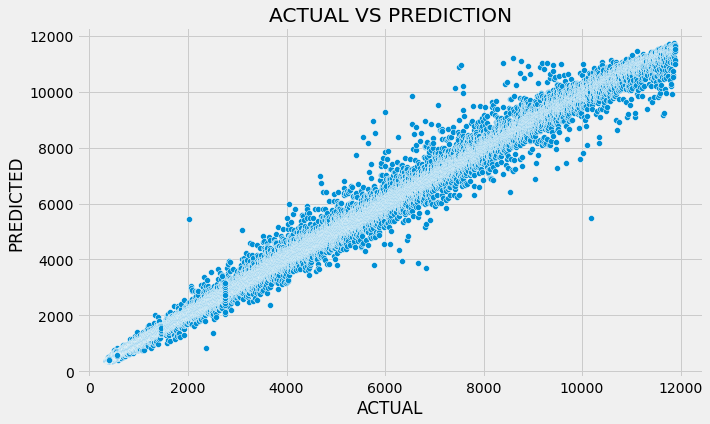

In [39]:
plt.figure(figsize=(10,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=Output,x='ACTUAL',y='PREDICTED');